## BioE 131/231 Fall 2019 Lab Assignment 
### Overview and references
You will develop a routine in Python to take an input nucleic acid sequence, run RNAfold to obtain a secondary structure and obtain a graphical representation of the folded RNA. Using your routine, you will fold some RNAs pulled from a recent publication and compare your structures to those provided. You are expected to keep a thorough record of everything you did in your notebook. Create a folder in your home directory for each lab, and keep all your files there. Try to create a directory hierarchy that makes sense, like the one we went over in Lab 1. Copy and paste any terminal commands you used into a Markdown section and explain what the input was, what the tool did, and what the output was. Plot any results in-line and explain them. An iPython notebook containing your analysis is due at midnight on Wednesday of next week. You can upload a link to your GitHub repo on bCourses. RNAfoldhttps://www.tbi.univie.ac.at/RNA/RNAfold.1.html Python subprocess module https://docs.python.org/3/library/subprocess.html Penchovsky and Breaker“Computational design and experimental validation of oligonucleotide-sensing allosteric ribozymes” URL: https://www.nature.com/articles/nbt1155 PDF has also been uploaded to bCourses. 

### Background
Your PI recently sent an interesting paper to the group’s listserv by Penchovsky and Breaker. They want to start using some of the riboswitches in the paper to control gene expression    in E. coli. You’ve been asked to pull the sequences out of the paper and conduct a first-pass analysis of them using RNAfold from the ViennaRNA package. Specifically, your PI wants to know if the sequences do, in fact, fold the way the authors say they do. Don’t worry if you can’t make too much sense of the publication, but do try to give it a quick read before getting started. 


#### Let’s try to understand what these things do

The paper provides a number of riboswitch sequences that adopt different conformations when one or more oligonucleotide binding sites (OBS) are bound. These different conformations have different functions, allowing the riboswitches to take input (i.e., whether or not OBS are bound) and turn that into an output (i.e., a different conformation and therefore different function). **Why are these riboswitches called AND-1 and OR-1?** Well, the riboswitches in this paper are attempts at implementing binary logic gates. The authors define the input to the logic gates as the presence (i.e., TRUE) or absence (i.e., FALSE) of a DNA oligonucleotide with a particular sequence. They define the output of the logic gates as whether the riboswitches themselves undergo self-cleavage(i.e., TRUE) or not (i.e., FALSE). The riboswitches undergo self-cleavage only when the correct oligonucleotides are bound to their target sites. In the paper, the blue regions of the riboswitches represent the OBS. When they are bound, consider that site to be receiving a TRUE input. The absence of OBS binding is a FALSE input. The red regions of the riboswitches are the sites responsible for self-cleavage. When the two red regions are aligned and bound to each other, consider that to be a TRUE output. When the red regions are not exactly bound, consider that to be a FALSE output. **Will the AND-1 riboswitch cleave itself when both of its OBS are bound?** **Will the OR-1 riboswitch cleave itself when neither of its OBS are bound? What behavior do we expect from the YES-1 riboswitch?**



<span style="color:blue">Answer</span>
- The switches are called AND-1 because it responds only if both molecular impulses happen. It is called OR-1 because either molecular impulse will result in a response
- The AND-1 riboswitch **will** cleave itself with both are bound, as per definition of AND.
- The OR-1 riboswitch **will not** clave itself when neither of its OBS are bound. 
- The YES-1 riboswitch will respond when a single molecule is present to bind it.

#### First up, grab the sequences from the paper

Have a look at the publication and see if you can figure out where the sequences they used have been uploaded. Are they    listed anywhere? It’s generally expected that any sequences used will be uploaded somewhere, but occasionally they are not. Please copy  down the sequences for the YES-1 riboswitch from Figure 2a, the NOT-1 riboswitch in Figure 4a, the AND-1 riboswitch in Figure 5a, and the OR-1 riboswitch in Figure 6a. For each riboswitch, produce a table in your iPython notebook that contains the following information: (1) riboswitch name, (2) start and end coordinates of OBS-1 (blue region), (3) start and end coordinates of OBS-2 (blue region, only applicable to AND-1 and OR-1), and (4) start and end coordinates of the two red regions.

<span style="color:blue">Answer</span>

YES-1: 
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC

NOT-1:
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC

AND-1:
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU

OR-1:
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC

| riboswitch name | start and end coordinates of OBS-1 | start and end coordinates of OBS-2 | start and end coordinates of the two red regions |
|-----------------|------------------------------------|------------------------------------|--------------------------------------------------|
|      YES-1      |                26-47               |                                    |                    4-21, 49-54                   |
|      NOT-1      |                44-66               |                                    |                   40-43, 74-77                   |
|      AND-1      |                30-45               |                49-64               |                   16-23, 70-77                   |
|       OR-1      |                27-46               |                47-66               |                   16-26, 67-77                   |

#### Now, write a routine to fold RNA

Have a look at the example in the lecture slides and use it to design a routine that runs the RNAfold command from within Python. Make sure you can get it to run in a terminal first. If it doesn’t run in a terminal, it won’t run in Python! Don’t forget to add some newlines at the end of your input, and an @ symbol to tell RNAfold you’re finished. Please put the resulting images you generate into Markdown sections of your iPython notebook!  
NOTE: If you find it easier to run RNAfold from a terminal, that’s fine, but make sure you provide a working function in your iPython notebook that calls RNAfold to demonstrate your understanding of the subprocess module.

In [71]:
import os
import subprocess
from subprocess import Popen, PIPE, STDOUT

sequences = {
    'YES-1': 'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC',
    'NOT-1': 'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC',
    'AND-1': 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCC' + \
             'GUAGGUUGCCCAGAGACAAU',
    'OR-1': 'GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'
}

folding_dict = {}

for name, sequence in sequences.items():
    p = Popen(['RNAfold'], stdout=PIPE, stdin=PIPE, stderr=PIPE)
    stdout_data = p.communicate(input=(sequence + "\n@\n").encode())[0]
    seq, folding = stdout_data.decode("utf-8").split("\n")[:-1]
    folding = folding[:-9]
    # print(seq + "\n" + folding)
    folding_dict[name] = (seq, folding)

for name, info in folding_dict.items():
    print(name)
    print(info[0])
    print(info[1])

YES-1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).))))))))
NOT-1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....))))
AND-1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).)))))))).........
OR-1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).))))))))


### The meat of the assignment

Once you have confirmed that your RNAfold routine works and is generating images (check for rna.ps in your current working directory), begin folding the riboswitches.  NOTE: you will not be able to open .ps file in the jupyter home interface. Try converting it to pdf using ps2pdf, then displaying it in your notebook using IPython.display.IFrame. 

1. Start by generating one plot per riboswitch (YES-1, NOT-1, AND-1, and OR-1) with default parameters. Compare each plot to the native conformation given in the publication. Are they the same? Are they different? Are there any stem-loop structures that don’t match up? What might explain the differences? See if you can track down the parameters the authors used and compare them to the default RNAfold parameters (e.g., temperature, algorithm, etc).Don’t kill yourself comparing every last base position to the paper, but do give us a general idea about the presence of stem-loops and whether the red regions have bound each other. 
2. Next, simulate OBS  binding in   YES-1 and NOT-1. The idea here is that we’d like to see what conformation these riboswitches adopt when their target OBS is bound. To simulate OBS binding, we tell RNAfold to prevent the blue OBS region (that we noted down in our table above) from pairing to any other region of the riboswitch. To do this, we pass the –C parameter to RNAfold using a file which you    will    have to generate.RNAfold –C YES-1_contraints.txt The    YES-1_contraints.txt file  should contain one letter for each base in YES-1. Use a dot (“.”) for every unconstrained base, and a lower-case x for every base that you want to prevent from pairing. That is to say, put an x at every base spanning the blue OBS region. Now, fold    YES-1 again with constraints and see what you get. Does it look like the self-cleaving form of YES-1 in Figure 2? Are the red regions bound to each other? Do the same for NOT-1.
3. Simulating OBS binding for AND-1 and OR-1 is more complicated. Recall that AND and OR logic gates  have two inputs, and so their truth tables have four rows: F/F, T/F, F/T, and T/T. In part (1) we simulated the F/F case, and so now must simulate the other three. This will require you to produce three constraint files for AND-1, and three for OR-1. One file will have OBS-1 x’d  out, another will have OBS-2 x’d out, and the third will have both OBS-1 and OBS-2 x’d out. Produce the constraint files, run RNAfold, and compare the output files to the paper. Determine whether the red regions (which you noted in your table above) pair with each other for each of the four possible input combinations. Generate a truth table for the AND-1 and the OR-1 riboswitches based on your results. According to your results, do the AND-1 and OR-1 riboswitches work as the paper claims?

In [72]:
def convert_to_pdf(pdf_name):
    p = Popen(['ps2pdf', "rna.pdf", pdf_name], stdout=PIPE, stdin=PIPE, stderr=PIPE)
    stdout_data = p.communicate()[0]
    return pdf_name

In [73]:
# for name, info in folding_dict.items():
#     seq, folding = info[0], info[1]
#     p = Popen(['RNAplot'], stdout=PIPE, stdin=PIPE, stderr=PIPE)
#     stdout_data = p.communicate(input=(seq + "\n" + folding + "\n@\n").encode())[0]
#     convert_to_pdf(name + ".pdf")

info = folding_dict['OR-1']
seq, folding = info[0], info[1]
p = Popen(['RNAplot'], stdout=PIPE, stdin=PIPE, stderr=PIPE)
stdout_data = p.communicate(input=(seq + "\n" + folding + "\n@\n").encode())[0]

FileNotFoundError: [Errno 2] No such file or directory: 'NOT-1.png'

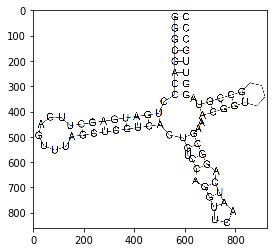

In [97]:
from IPython.display import IFrame
import matplotlib.pyplot as plt
from PIL import Image



for name, info in folding_dict.items():
    seq, folding = info[0], info[1]
    name = name + ".png"
    im = Image.open(name)
#     print(im)
    plt.imshow(im)
#     print(name)
#     plt.imshow(name)
#     plt.plot()
    
